In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
import keras
from tensorflow import keras
from keras import callbacks
#rom tensorflow.keras import Sequential
#from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
#from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'numpy'

In [2]:

data = pd.read_csv("Camera_Traffic_Counts.csv")

data.head()


,Record ID,Read Date,Intersection Name,Direction,Volume,Seconds in Zone Average,Year,Day of Week
0,706b32f603f362d61b0b88a4951682ca,12/16/2019 07:45:00 AM,CAPITAL OF TEXAS HWY / PASCAL LN,SOUTHBOUND,557,2.819,2019,1
1,94d903a6ed675036215683e3357e2b56,12/11/2019 07:45:00 AM,CAPITAL OF TEXAS HWY / PASCAL LN,SOUTHBOUND,542,2.826,2019,3
2,58b3797e12e2d95f1e9e2996951e1f8b,11/13/2019 04:30:00 PM,CAPITAL OF TEXAS HWY / PASCAL LN,SOUTHBOUND,537,2.726,2019,3
3,d52ceab94615d260d5707e83acc4e9fe,12/11/2019 08:15:00 AM,CAPITAL OF TEXAS HWY / PASCAL LN,SOUTHBOUND,528,3.216,2019,3
4,7747c124d49bb777fddf3a54b2285c8e,11/22/2019 05:15:00 PM,CAPITAL OF TEXAS HWY / PASCAL LN,SOUTHBOUND,526,3.477,2019,5


In [3]:
 
#trying to remove Record ID but it doesnt exist apparently 

data["Read Date"]= pd.to_datetime(data["Read Date"])

print(data.columns)

# Drop the column "Record ID"
data = data.drop("Record ID", axis=1)

data.info()

Index(['Record ID', 'Read Date', 'Intersection Name', 'Direction', 'Volume',
       'Seconds in Zone Average', 'Year', 'Day of Week'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038818 entries, 0 to 4038817
Data columns (total 7 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Read Date                datetime64[ns]
 1   Intersection Name        object        
 2   Direction                object        
 3   Volume                   int64         
 4   Seconds in Zone Average  float64       
 5   Year                     int64         
 6   Day of Week              int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 215.7+ MB


In [4]:
# Convert intersection names to numbers


data['Intersection Name'] = pd.factorize(data['Intersection Name'])[0]

data.info()

data.head()

df1 = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038818 entries, 0 to 4038817
Data columns (total 7 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Read Date                datetime64[ns]
 1   Intersection Name        int64         
 2   Direction                object        
 3   Volume                   int64         
 4   Seconds in Zone Average  float64       
 5   Year                     int64         
 6   Day of Week              int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 215.7+ MB


In [5]:
# Assuming your DataFrame is named df and you have a datetime column called "Timestamp" and a volume column called "Volume"

# Convert the "Timestamp" column to a datetime type if it's not already in that format
data['Read Date'] = pd.to_datetime(data['Read Date'])

# Set the "Timestamp" column as the index of the DataFrame
data.set_index('Read Date', inplace=True)

# Resample the data to hourly frequency and sum the volumes
df_hourly = data['Volume'].resample('H').sum()

# Reset the index to make the "Timestamp" column a regular column again
df_hourly = df_hourly.reset_index()

# Print the hourly volume data
print(df_hourly)

                Read Date  Volume
0     2019-11-07 00:00:00     187
1     2019-11-07 01:00:00     103
2     2019-11-07 02:00:00      79
3     2019-11-07 03:00:00      80
4     2019-11-07 04:00:00     216
...                   ...     ...
31555 2023-06-13 19:00:00    2195
31556 2023-06-13 20:00:00    2314
31557 2023-06-13 21:00:00    1223
31558 2023-06-13 22:00:00     704
31559 2023-06-13 23:00:00     416

[31560 rows x 2 columns]


In [6]:
df_hourly.head()

,Read Date,Volume
0,2019-11-07 00:00:00,187
1,2019-11-07 01:00:00,103
2,2019-11-07 02:00:00,79
3,2019-11-07 03:00:00,80
4,2019-11-07 04:00:00,216


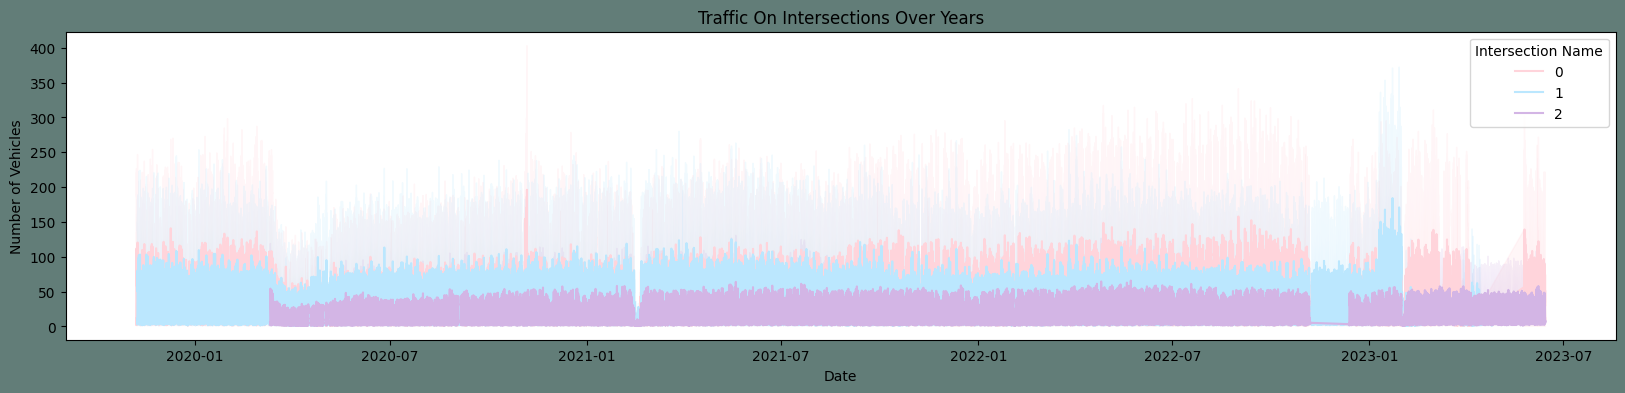

In [7]:

df=data.copy()
colors = ["#FFD4DB", "#BBE7FE", "#D3B5E5", "#dfe2b6"]
plt.figure(figsize=(20, 4), facecolor="#627D78")
Time_series = sns.lineplot(x=df.index, y="Volume", data=df, hue="Intersection Name", palette=colors)
Time_series.set_title("Traffic On Intersections Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")
plt.show()

In [8]:


df1["Year"] = df1['Read Date'].dt.year
df1["Month"] = df1['Read Date'].dt.month
df1["Date_no"] = df1['Read Date'].dt.day
df1["Hour"] = df1['Read Date'].dt.hour
df1["Day"] = df1['Read Date'].dt.strftime("%A")

df1.head()


,Read Date,Intersection Name,Direction,Volume,Seconds in Zone Average,Year,Day of Week,Month,Date_no,Hour,Day
0,2019-12-16 07:45:00,0,SOUTHBOUND,557,2.819,2019,1,12,16,7,Monday
1,2019-12-11 07:45:00,0,SOUTHBOUND,542,2.826,2019,3,12,11,7,Wednesday
2,2019-11-13 16:30:00,0,SOUTHBOUND,537,2.726,2019,3,11,13,16,Wednesday
3,2019-12-11 08:15:00,0,SOUTHBOUND,528,3.216,2019,3,12,11,8,Wednesday
4,2019-11-22 17:15:00,0,SOUTHBOUND,526,3.477,2019,5,11,22,17,Friday


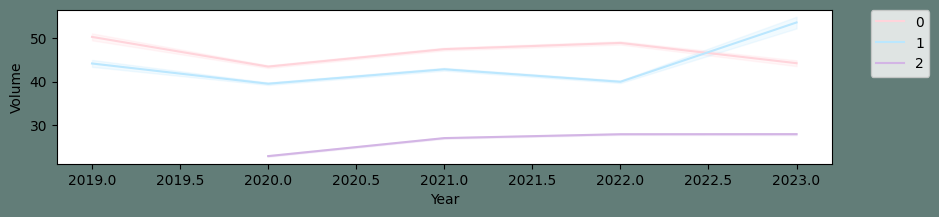

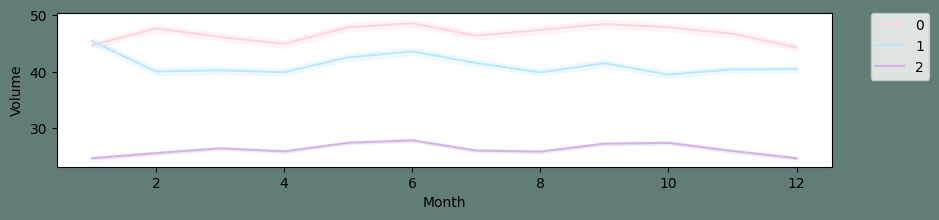

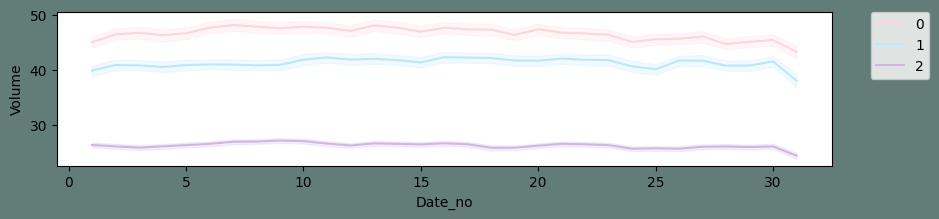

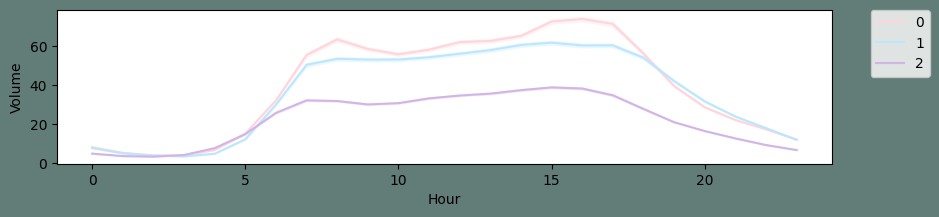

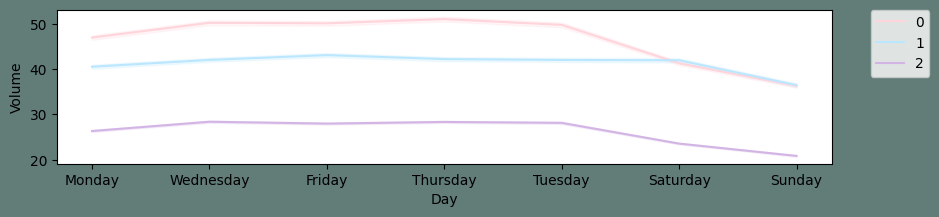

In [9]:
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2),facecolor="#627D78")
    ax=sns.lineplot(x=df1[i],y="Volume",data=df1, hue="Intersection Name", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From this we can tell that:
-The number 2 intersection is relativley new compared to 0 and 1
-The weekends see significantly less traffic than the week days
-for intersection 1 and 2 traffic has been increasing since 2020 
-intersection 0 took an interesting dip down last yeaer, but we do not know the kistory (construction, etc)


Text(0.5, 0, 'Date')

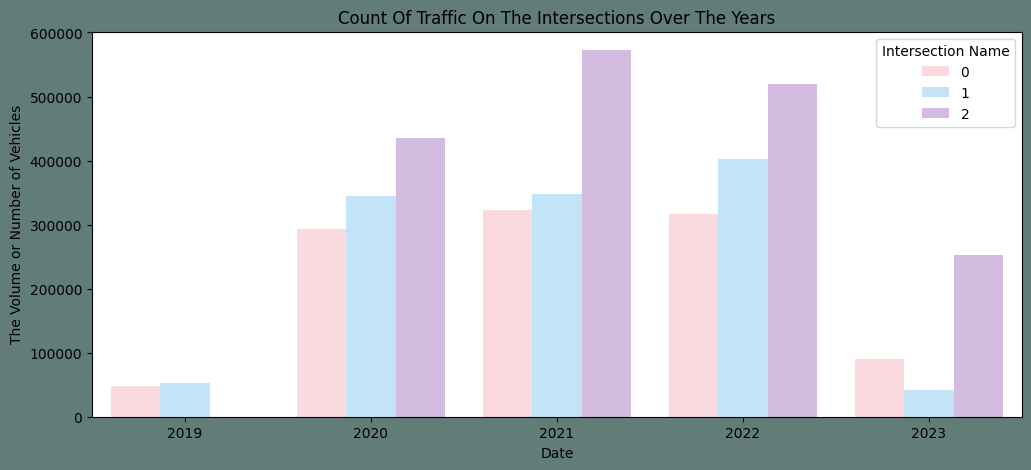

In [10]:
#

plt.figure(figsize=(12,5),facecolor="#627D78")
count = sns.countplot(data=df, x =df["Year"], hue="Intersection Name", palette=colors)
count.set_title("Count Of Traffic On The Intersections Over The Years")
count.set_ylabel("The Volume or Number of Vehicles")
count.set_xlabel("Date")

In [11]:
columns_to_remove = ['Direction', 'Day']  # List of column names to remove
df2 = df1.drop(columns=columns_to_remove)

<Axes: >

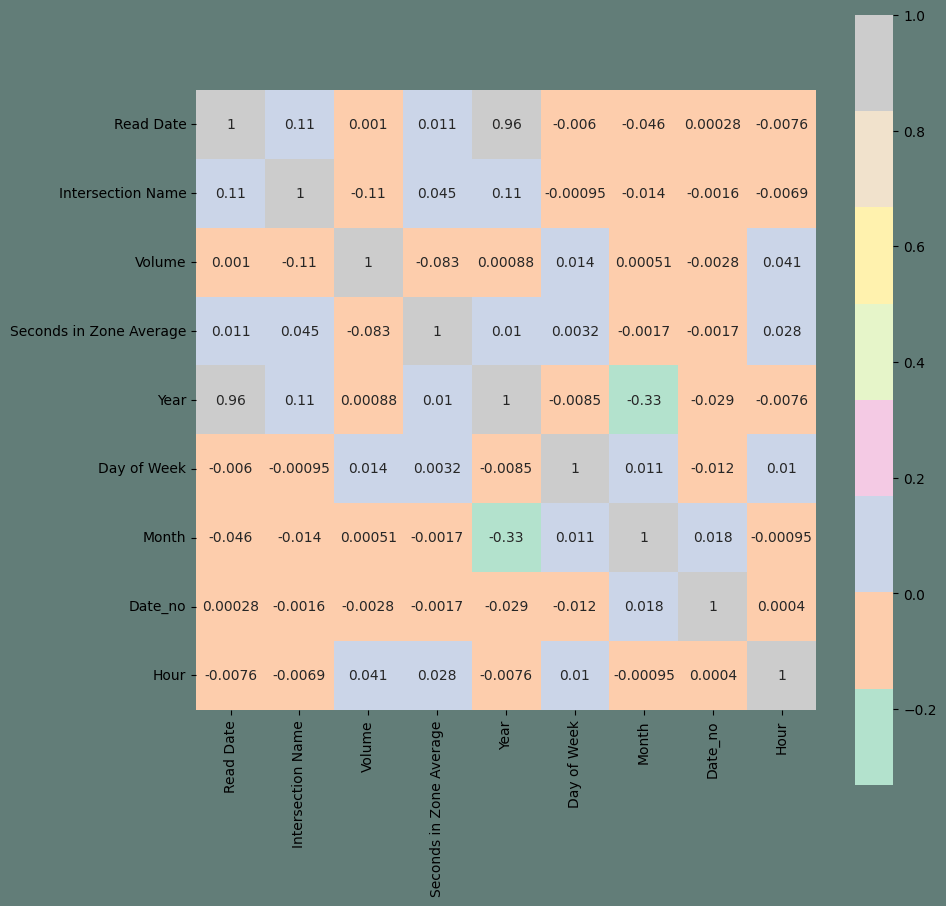

In [12]:
corrmat = df2.corr()
plt.subplots(figsize=(10,10),facecolor="#627D78")
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, )



In [13]:
df2 = df2.drop_duplicates(subset="Read Date")


In [14]:
#creating data frames for each intersection
dfI = df2.pivot(columns="Intersection Name", index="Read Date")
dfI.describe()

Volume                              \
Intersection Name             0             1             2   
count              39564.000000  64960.000000  20750.000000   
mean                 267.162521    220.778618     99.453012   
std                  204.040464    164.716239    104.715052   
min                    1.000000      1.000000      1.000000   
25%                   56.000000     53.000000     15.000000   
50%                  285.000000    239.000000     49.000000   
75%                  434.000000    357.000000    180.000000   
max                  822.000000    958.000000    520.000000   

                  Seconds in Zone Average                              \
Intersection Name                       0             1             2   
count                        39564.000000  64960.000000  20750.000000   
mean                             2.302918      2.647821      3.772734   
std                              1.246023      1.636121      2.992883   
min                              0.000000      0.100000      0.000000   
25%                              1.633000      1.898000      1.680000   
50%                              2.216000      2.343000      3.100000   
75%                              2.874250      2.893000      4.807000   
max                            151.824000    133.775000     58.500000   

                           Year                               Day of Week  \
Intersection Name             0             1             2             0   
count              39564.000000  64960.000000  20750.000000  39564.000000   
mean                2021.392882   2020.813470   2021.811566      3.015646   
std                    1.063880      0.982167      1.055207      1.988538   
min                 2019.000000   2019.000000   2020.000000      0.000000   
25%                 2021.000000   2020.000000   2021.000000      1.000000   
50%                 2022.000000   2021.000000   2022.000000      3.000000   
75%                 2022.000000   2022.000000   2023.000000      5.000000   
max                 2023.000000   2023.000000   2023.000000      6.000000   

                   ...                       Month                \
Intersection Name  ...             2             0             1   
count              ...  20750.000000  39564.000000  64960.000000   
mean               ...      2.927422      6.392149      6.427232   
std                ...      1.952823      3.547572      3.714391   
min                ...      0.000000      1.000000      1.000000   
25%                ...      1.000000      3.000000      3.000000   
50%                ...      3.000000      6.000000      6.000000   
75%                ...      5.000000     10.000000     10.000000   
max                ...      6.000000     12.000000     12.000000   

                                      Date_no                              \
Intersection Name             2             0             1             2   
count              20750.000000  39564.000000  64960.000000  20750.000000   
mean                   5.820530     15.584344     15.887377     15.568193   
std                    2.913451      8.828285      8.766003      8.733680   
min                    1.000000      1.000000      1.000000      1.000000   
25%                    4.000000      8.000000      8.000000      8.000000   
50%                    5.000000     15.000000     16.000000     16.000000   
75%                    8.000000     23.000000     23.000000     23.000000   
max                   12.000000     31.000000     31.000000     31.000000   

                           Hour                              
Intersection Name             0             1             2  
count              39564.000000  64960.000000  20750.000000  
mean                  11.558816     12.713685      7.590313  
std                    6.572626      6.837958      6.368987  
min                    0.000000      0.000000      0.000000  
25%                    7.000000      8.000000      3.000000  
50%   

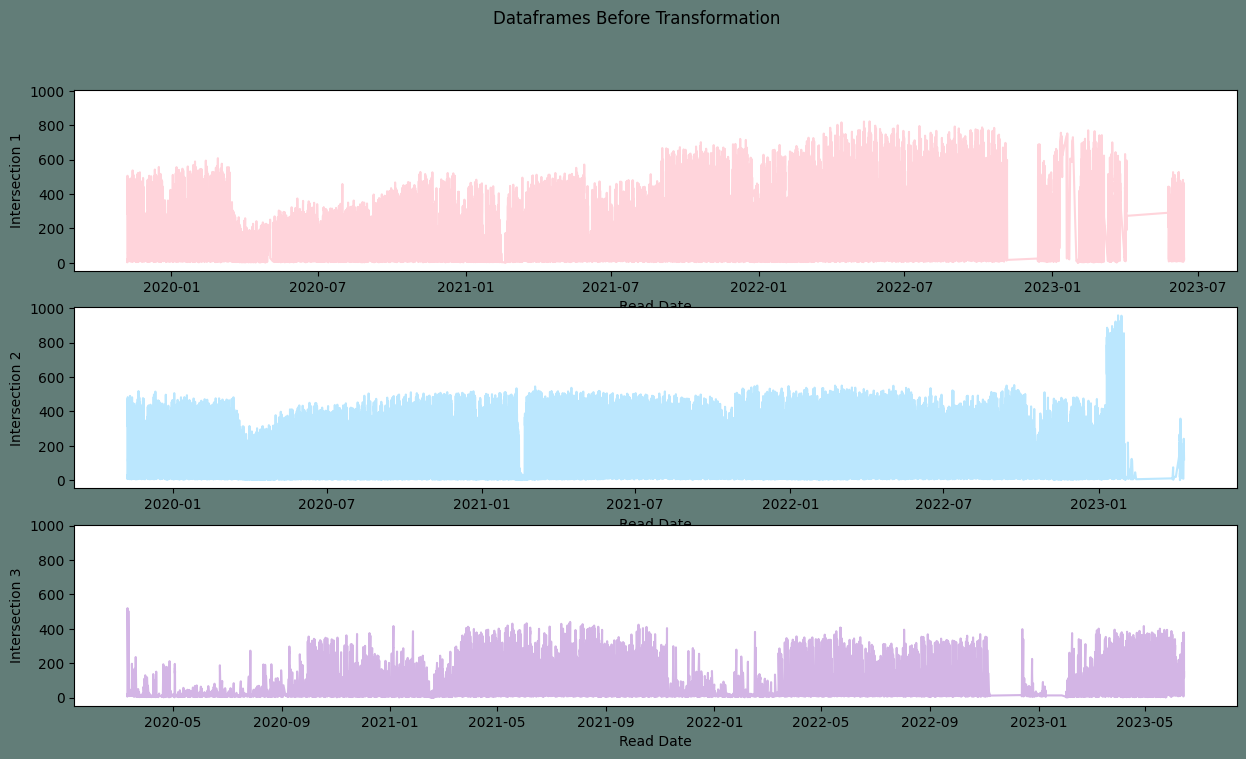

In [15]:
#Creating new sets
df_1 = dfI[[('Volume', 0)]]
df_2 = dfI[[('Volume', 1)]]
df_3 = dfI[[('Volume', 2)]]

#Dropping level one in dfs's index as it is a multi index data frame
list_dfs = [df_1, df_2, df_3,]
for i in list_dfs:
    i.columns= i.columns.droplevel(level=1)   

#Function to plot comparitive plots of dataframes
def Sub_Plots4(df_1, df_2,df_3,title):
    fig, axes = plt.subplots(3, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)
    fig.suptitle(title)
    #J1
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[0])
    #pl_1=plt.ylabel()
    axes[0].set(ylabel ="Intersection 1")
    #J2
    pl_2=sns.lineplot(ax=axes[1],data=df_2,color=colors[1])
    axes[1].set(ylabel ="Intersection 2")
    #J3
    pl_3=sns.lineplot(ax=axes[2],data=df_3,color=colors[2])
    axes[2].set(ylabel ="Intersection 3")
    
    
    
#Plotting the dataframe to check for stationarity
Sub_Plots4(df_1.Volume, df_2.Volume,df_3.Volume,"Dataframes Before Transformation")

In [16]:
# Normalize Function
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev

# Differencing Function
def Difference(df,col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff

In [ ]:
#For intersection one, I'll take a difference of weekly values.
#For intersection two, difference of consecutive days 
#For intersecton three ,  difference of the hourly values 

In [17]:
#Normalizing and Differencing to make the series stationary 
df_N1, av_I1, std_I1 = Normalize(df_1, "Volume")
Diff_1 = Difference(df_N1, col="Volume", interval=(24*7)) #taking a week's diffrence
df_N1 = df_N1[24*7:]
df_N1.columns = ["Norm"]
df_N1["Diff"]= Diff_1

df_N2, av_I2, std_I2 = Normalize(df_2, "Volume")
Diff_2 = Difference(df_N2, col="Volume", interval=(24)) #taking a day's diffrence
df_N2 = df_N2[24:]
df_N2.columns = ["Norm"]
df_N2["Diff"]= Diff_2

df_N3, av_I3, std_I3 = Normalize(df_3, "Volume")
Diff_3 = Difference(df_N3, col="Volume", interval=1) #taking an hour's diffrence
df_N3 = df_N3[1:]
df_N3.columns = ["Norm"]
df_N3["Diff"]= Diff_3


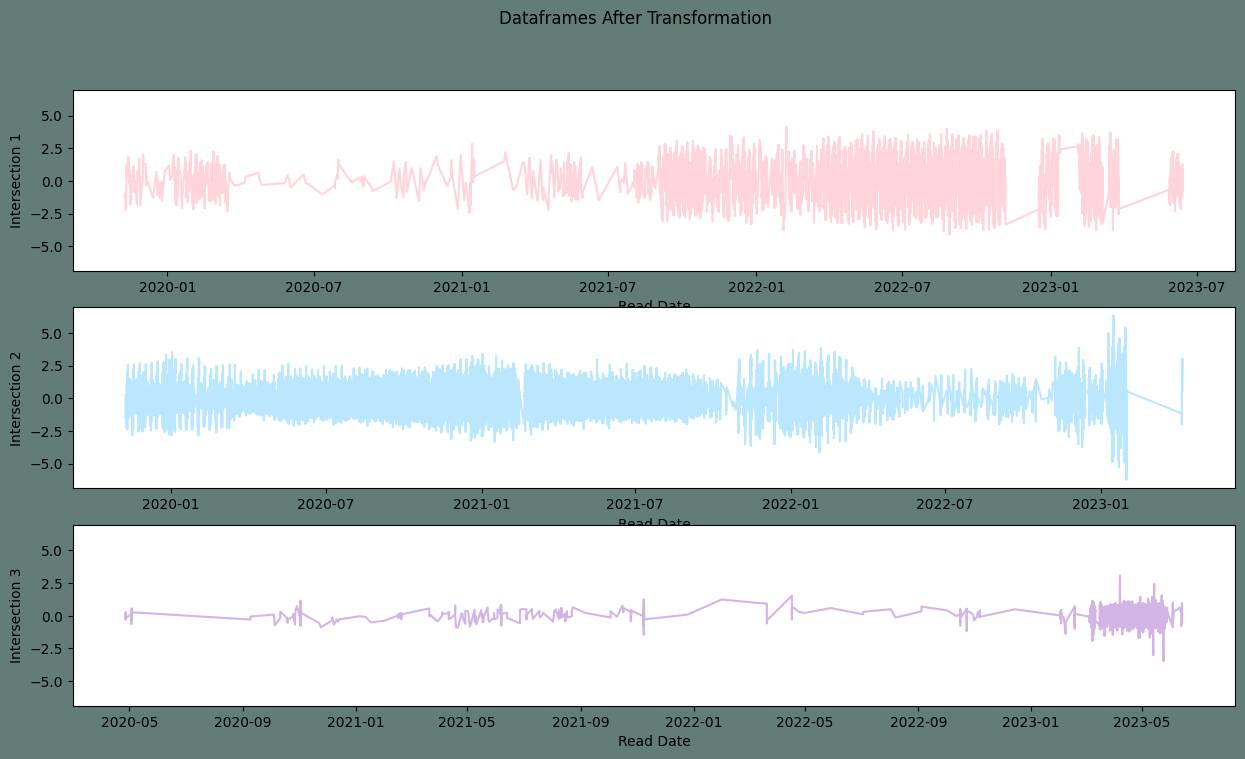

In [181]:
Sub_Plots4(df_N1.Diff, df_N2.Diff,df_N3.Diff,"Dataframes After Transformation")

In [18]:
#Stationary Check for the time series Augmented Dickey Fuller test
def Stationary_check(df):
    check = adfuller(df.dropna())
    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")
    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Time Series is Non-Stationary")
    else:
        print("Time Series is Stationary") 
  

#Checking if the series is stationary

List_df_ND = [ df_N1["Diff"], df_N2["Diff"], df_N3["Diff"]] 
print("Checking the transformed series for stationarity:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)

Checking the transformed series for stationarity:


ADF Statistic: -19.16950650030469
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -35.7338690670197
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -11.816103340021332
p-value: 8.63075650697122e-22
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


In [ ]:
#Splitting the test train sets
#Assigning X as features and y as target
#Reshaping data for neural net

In [20]:
#Differencing created some NA values as we took a weeks data into consideration while difrencing
dfI_1 = df_N1["Diff"].dropna()
dfI_1 = dfI_1.to_frame()

dfI_2 = df_N2["Diff"].dropna()
dfI_2 = dfI_2.to_frame()

dfI_3 = df_N3["Diff"].dropna()
dfI_3 = dfI_3.to_frame()

#Splitting the dataset
def Split_data(df):
    training_size = int(len(df)*0.90)
    data_len = len(df)
    train, test = df[0:training_size],df[training_size:data_len] 
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test
#Splitting the training and test datasets 
I1_train, I1_test = Split_data(dfI_1)
I2_train, I2_test = Split_data(dfI_2)
I3_train, I3_test = Split_data(dfI_3)
#Target and Feature
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y

#fixing the shape of X_test and X_train
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test

#Assigning features and target 
X_trainI1, y_trainI1 = TnF(I1_train)
X_testI1, y_testI1 = TnF(I1_test)
X_trainI1, X_testI1 = FeatureFixShape(X_trainI1, X_testI1)

X_trainI2, y_trainI2 = TnF(I2_train)
X_testI2, y_testI2 = TnF(I2_test)
X_trainI2, X_testI2 = FeatureFixShape(X_trainI2, X_testI2)

X_trainI3, y_trainI3 = TnF(I3_train)
X_testI3, y_testI3 = TnF(I3_test)
X_trainI3, X_testI3 = FeatureFixShape(X_trainI3, X_testI3)


In [ ]:
#In this section, I am creating a function for the neural net to call on and fit the data frames for all 3 intersections.

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import SGD

# Model for the prediction
def GRU_model(X_Train, y_Train, X_Test):
    early_stopping = tf.keras.callbacks.EarlyStopping(min_delta=0.001, patience=10, restore_best_weights=True)

    # The GRU model
    model = Sequential()
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    # Compiling the model
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    model.fit(X_Train, y_Train, epochs=50, batch_size=150, callbacks=[early_stopping])
    pred_GRU = model.predict(X_Test)
    return pred_GRU

# To calculate the root mean squared error in predictions
def RMSE_Value(test, predicted):
    rmse = tf.sqrt(tf.keras.losses.mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

# To plot the comparative plot of targets and predictions
def PredictionsPlot(test, predicted, m):
    plt.figure(figsize=(12,5), facecolor="#627D78")
    plt.plot(test, color=colors[m], label="True Value", alpha=0.5)
    plt.plot(predicted, color="#627D78", label="Predicted Values")
    plt.title("GRU Traffic Prediction Vs True values")
    plt.xlabel("Read Date")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

# Predictions for intersection 1
PredI_1 = GRU_model(X_trainI1, y_trainI1, X_testI1)

2023-06-21 19:45:28.386446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 19:45:28.388742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 19:45:28.390452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-06-21 19:45:29.610000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 19:45:29.612566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 19:45:29.614289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

94/94 [==============================] - 24s 181ms/step - loss: 1.5062
Epoch 2/50
94/94 [==============================] - 18s 190ms/step - loss: 0.9426
Epoch 3/50
94/94 [==============================] - 18s 197ms/step - loss: 0.8245
Epoch 4/50
94/94 [==============================] - 18s 188ms/step - loss: 0.8088
Epoch 5/50
94/94 [==============================] - 18s 195ms/step - loss: 0.7785
Epoch 6/50
94/94 [==============================] - 17s 185ms/step - loss: 0.7744
Epoch 7/50
94/94 [==============================] - 17s 184ms/step - loss: 0.7712
Epoch 8/50
94/94 [==============================] - 18s 196ms/step - loss: 0.7722
Epoch 9/50
94/94 [==============================] - 19s 202ms/step - loss: 0.7711
Epoch 10/50
94/94 [==============================] - 18s 192ms/step - loss: 0.7658
Epoch 11/50
94/94 [==============================] - 18s 196ms/step - loss: 0.7578
Epoch 12/50
94/94 [==============================] - 17s 176ms/step - loss: 0.7637
Epoch 13/50
94/94 [=====

2023-06-21 20:01:26.549911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 20:01:26.552043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 20:01:26.553567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

48/48 [==============================] - 3s 19ms/step


The root mean squared error is [1.2265234 1.3683989 1.3927658 ... 1.137931  1.1044257 1.3242904].


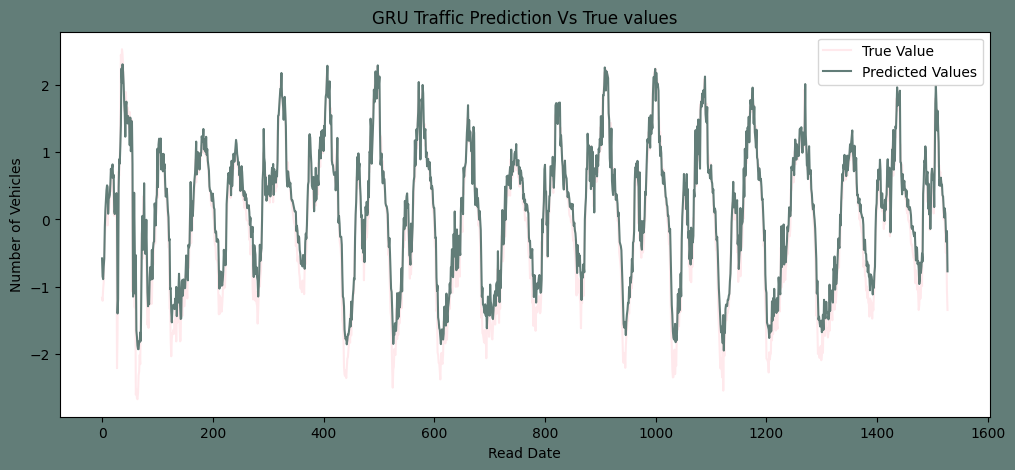

In [29]:
#Results for I1
RMSE_I1=RMSE_Value(y_testI1,PredI_1)
PredictionsPlot(y_testI1,PredI_1,0)


In [30]:
PredI_2 = GRU_model(X_trainI2,y_trainI2,X_testI2)


2023-06-21 20:04:21.070305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 20:04:21.073065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 20:04:21.074523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-06-21 20:04:22.046684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 20:04:22.048889: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 20:04:22.050438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

242/242 [==============================] - 53s 191ms/step - loss: 0.5790
Epoch 2/50
242/242 [==============================] - 46s 190ms/step - loss: 0.3499
Epoch 3/50
242/242 [==============================] - 47s 193ms/step - loss: 0.3230
Epoch 4/50
242/242 [==============================] - 45s 186ms/step - loss: 0.3150
Epoch 5/50
242/242 [==============================] - 47s 195ms/step - loss: 0.3119
Epoch 6/50
242/242 [==============================] - 43s 179ms/step - loss: 0.3062
Epoch 7/50
242/242 [==============================] - 44s 182ms/step - loss: 0.3061
Epoch 8/50
242/242 [==============================] - 45s 186ms/step - loss: 0.3027
Epoch 9/50
242/242 [==============================] - 44s 181ms/step - loss: 0.2991
Epoch 10/50
242/242 [==============================] - 43s 178ms/step - loss: 0.2971
Epoch 11/50
242/242 [==============================] - 44s 181ms/step - loss: 0.2990
Epoch 12/50
242/242 [==============================] - 46s 192ms/step - loss: 0.2929


2023-06-21 20:41:38.924308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 20:41:38.926877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 20:41:38.928999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

125/125 [==============================] - 3s 15ms/step


The root mean squared error is [2.0153947 2.0122652 2.0090806 ... 2.3180726 2.3822722 2.0526075].


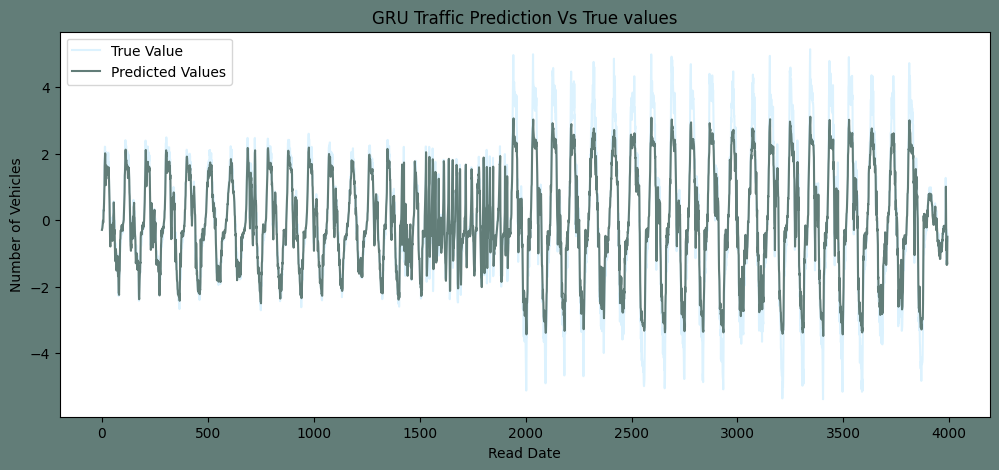

In [31]:
#Results for J2
RMSE_J2=RMSE_Value(y_testI2,PredI_2)
PredictionsPlot(y_testI2,PredI_2,1)

In [32]:
PredI_3 = GRU_model(X_trainI3,y_trainI3,X_testI3) 


2023-06-21 21:01:23.173913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 21:01:23.175855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 21:01:23.177834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-06-21 21:01:23.826548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 21:01:23.829247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 21:01:23.831089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

96/96 [==============================] - 24s 158ms/step - loss: 0.0627
Epoch 2/50
96/96 [==============================] - 16s 166ms/step - loss: 0.0614
Epoch 3/50
96/96 [==============================] - 17s 175ms/step - loss: 0.0611
Epoch 4/50
96/96 [==============================] - 16s 170ms/step - loss: 0.0608
Epoch 5/50
96/96 [==============================] - 16s 171ms/step - loss: 0.0610
Epoch 6/50
96/96 [==============================] - 16s 169ms/step - loss: 0.0608
Epoch 7/50
96/96 [==============================] - 19s 203ms/step - loss: 0.0607
Epoch 8/50
96/96 [==============================] - 16s 164ms/step - loss: 0.0606
Epoch 9/50
96/96 [==============================] - 17s 180ms/step - loss: 0.0609
Epoch 10/50
96/96 [==============================] - 16s 168ms/step - loss: 0.0605
Epoch 11/50
96/96 [==============================] - 16s 170ms/step - loss: 0.0603
Epoch 12/50
96/96 [==============================] - 16s 170ms/step - loss: 0.0604
Epoch 13/50
96/96 [=====

2023-06-21 21:15:34.812588: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 21:15:34.814385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 21:15:34.816403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

49/49 [==============================] - 2s 15ms/step


The root mean squared error is [0.27560714 0.27248016 0.27122638 ... 0.27248305 0.27893957 0.2811591 ].


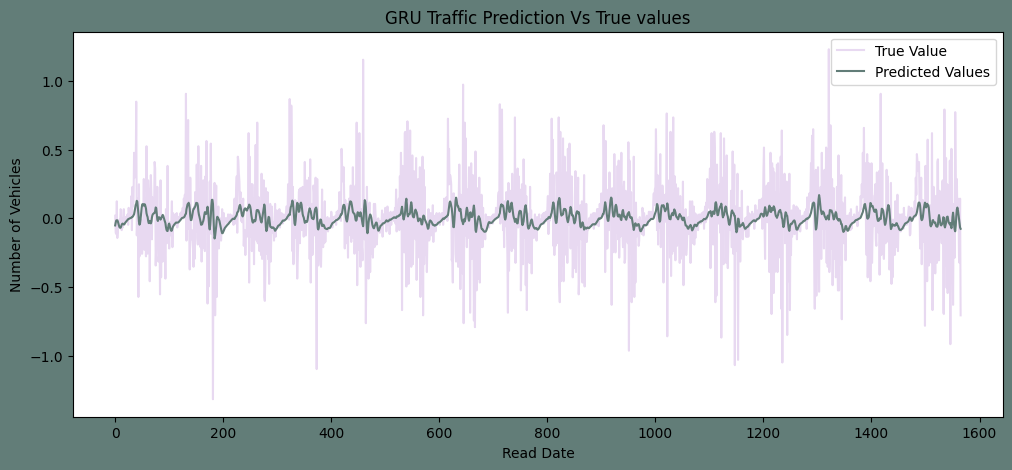

In [33]:
#Results for J3
RMSE_I3=RMSE_Value(y_testI3,PredI_3)
PredictionsPlot(y_testI3,PredI_3,2)

In [ ]:
#In this section, I will be inversing transforms that I applied to the datasets to remove the seasonality and trends. 
#Performing this step will make the predictions get back on the accurate scale.

In [34]:
# Functions to inverse transforms and Plot comparitive plots
# invert differenced forecast
def inverse_difference(last_ob, value):
    inversed = value + last_ob
    return inversed
#Plotting the comparison
def Sub_Plots2(dfI_1, dfI_2,title,m):
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True,facecolor="#627D78")
    fig.suptitle(title)
    
    pl_1=sns.lineplot(ax=axes[0],data=dfI_1,color=colors[m])
    axes[0].set(ylabel ="Prediction")
    
    pl_2=sns.lineplot(ax=axes[1],data=dfI_2["Volume"],color="#627D78")
    axes[1].set(ylabel ="Orignal")

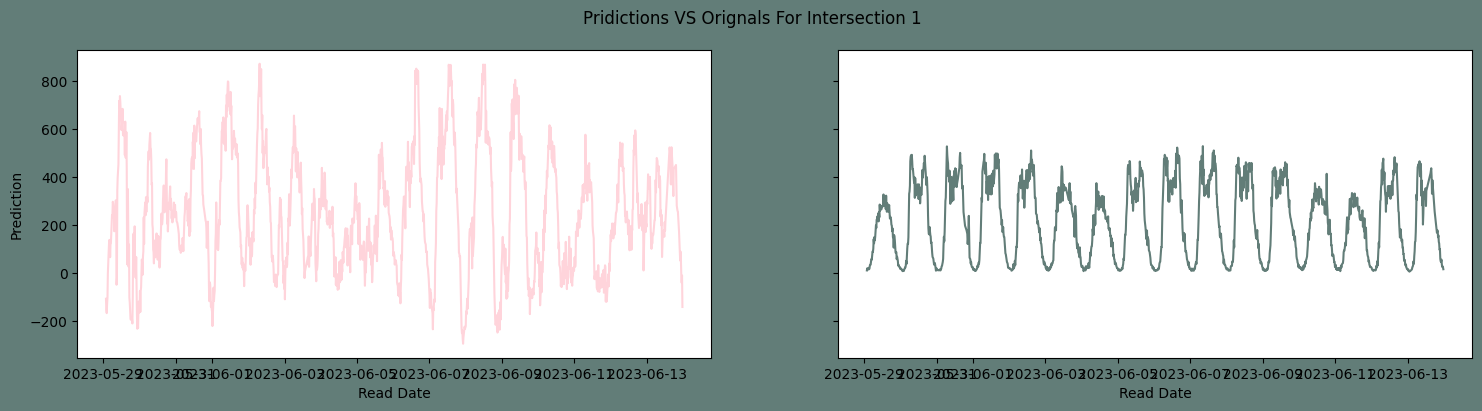

In [46]:
# invert the differenced forecast for Intersection 1 
recover1 = df_N1.Norm[-1529:-1].to_frame()
recover1["Pred"]= PredI_1
Transform_reverssed_I1 = inverse_difference(recover1.Norm, recover1.Pred).to_frame()
Transform_reverssed_I1.columns = ["Pred_Normed"]
#Invert the normalizeation 
Final_I1_Pred = (Transform_reverssed_I1.values* std_I1) + av_I1
Transform_reverssed_I1["Pred_Final"] =Final_I1_Pred
#Plotting the Predictions with orignals 
Sub_Plots2(Transform_reverssed_I1["Pred_Final"], df_1[-1529:-1],"Pridictions VS Orignals For Intersection 1", 0)

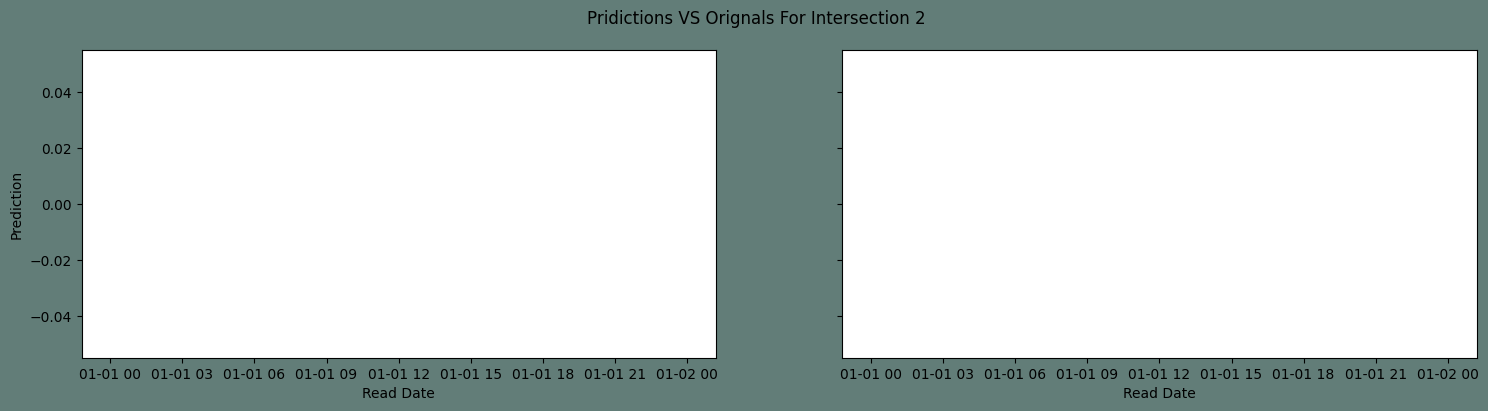

In [47]:
#Invert the differenced Intersection 2
recover2 = df_N2.Norm[-3993:-1].to_frame() #len as per the diff
recover2["Pred"]= PredI_2
Transform_reverssed_I2 = inverse_difference(recover2.Norm, recover2.Pred).to_frame()
Transform_reverssed_I2.columns = ["Pred_Normed"]
Final_I2_Pred = (Transform_reverssed_I2.values* std_I2) + av_I2
Transform_reverssed_I2["Pred_Final"] =Final_I2_Pred
#Plotting the Predictions with orignals 
Sub_Plots2(Transform_reverssed_I2["Pred_Final"], df_2[-3993:-1],"Pridictions VS Orignals For Intersection 2", 1)

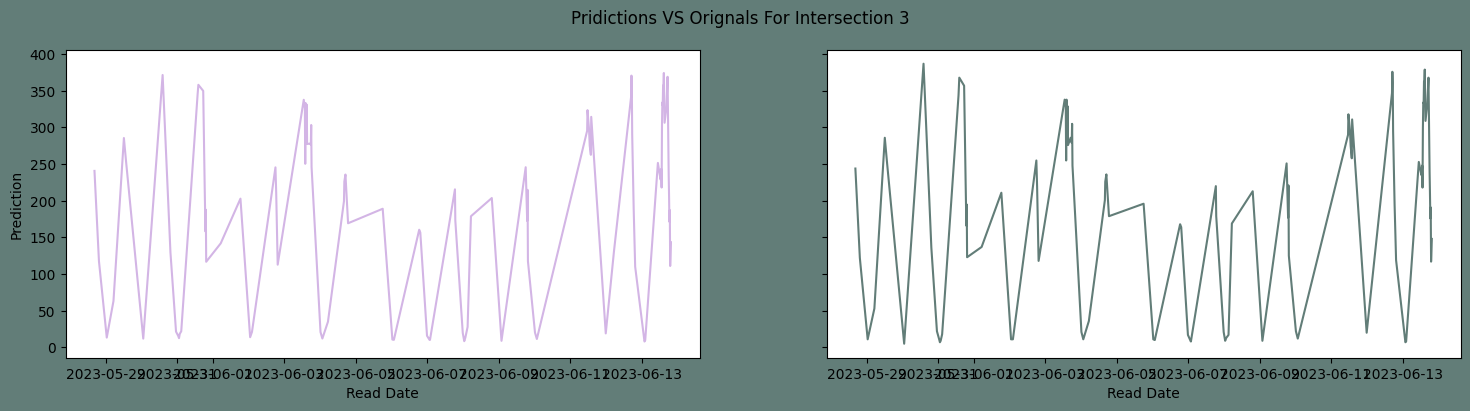

In [48]:
#Invert the differenced intesection 3
recover3 = df_N3.Norm[-1567:-1].to_frame() #len as per the diff
recover3["Pred"]= PredI_3
Transform_reverssed_I3 = inverse_difference(recover3.Norm, recover3.Pred).to_frame()
Transform_reverssed_I3.columns = ["Pred_Normed"]
#Invert the normalizeation 
Final_I3_Pred = (Transform_reverssed_I3.values* std_I3) + av_I3
Transform_reverssed_I3["Pred_Final"] =Final_I3_Pred
Sub_Plots2(Transform_reverssed_I3["Pred_Final"], df_3[-1567:-1],"Pridictions VS Orignals For Intersection 3", 2)